In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loading the dataset
df = pd.read_csv('admission_predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
# Renaming the columns with appropriate names
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Removing the serial no, column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

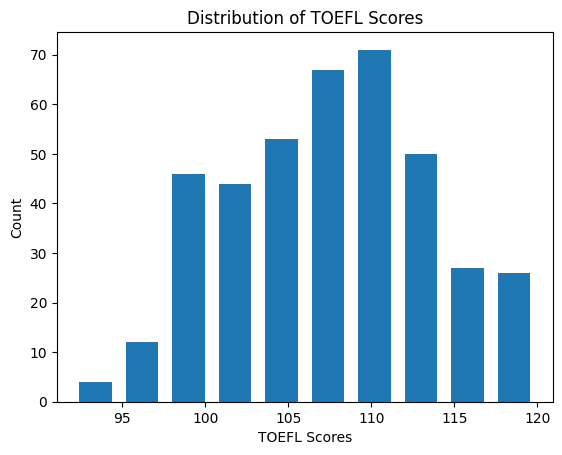

In [7]:
# Visualizing the feature TOEFL
fig = plt.hist(df['TOEFL'], rwidth=0.7)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

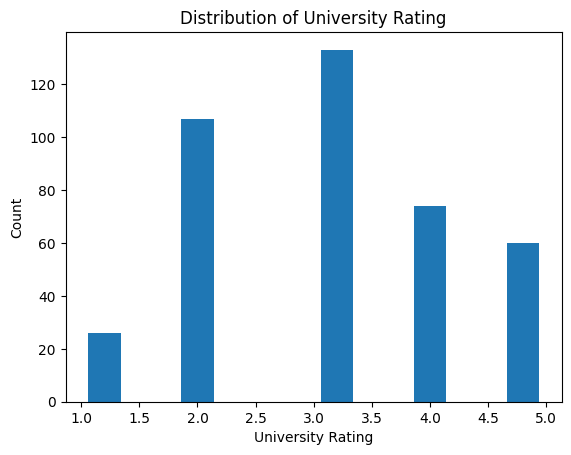

In [8]:
# Visualizing the feature TOEFL
fig = plt.hist(df['University Rating'], rwidth=0.7)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

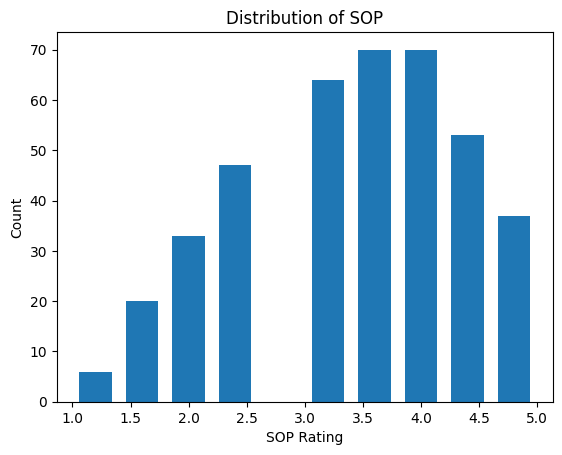

In [9]:
# Visualizing the feature TOEFL
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

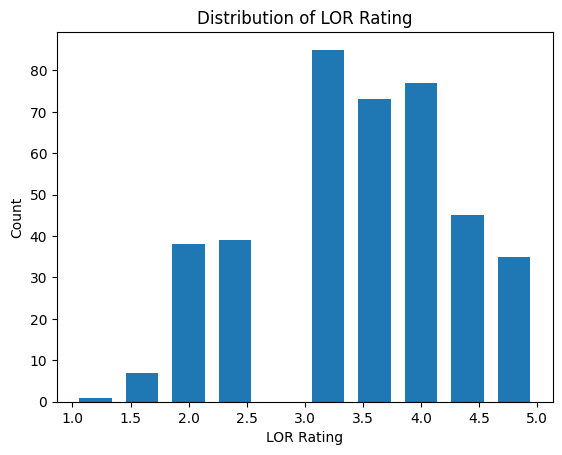

In [10]:
# Visualizing the feature TOEFL
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

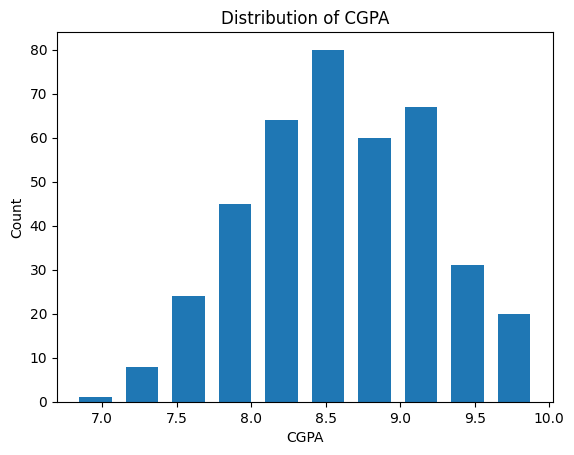

In [11]:
# Visualizing the feature TOEFL
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

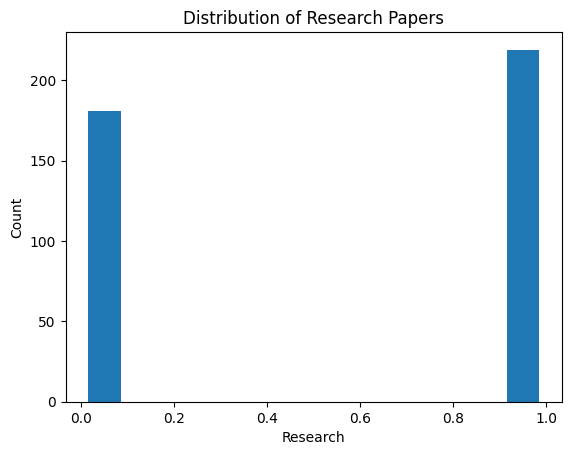

In [12]:
# Visualizing the feature TOEFL
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Data Cleaning</p> 

In [13]:
df

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [14]:
# Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [15]:
# Splitting the dataset in features and label
X = df_copy.drop('Probability', axis=1)
y = df_copy['Probability']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
rounded_r2 = round(r2, 2)
print("R-squared (rounded):", rounded_r2)

R-squared: 0.8212082591486993
R-squared (rounded): 0.82


In [18]:
print(X_test)

     GRE  TOEFL  University Rating  SOP  LOR  CGPA  Research
209  301    104                  3  3.5  4.0  8.12         1
280  311    102                  3  4.5  4.0  8.64         1
33   340    114                  5  4.0  4.0  9.60         1
210  325    108                  4  4.5  4.0  9.06         1
93   301     97                  2  3.0  3.0  7.88         1
..   ...    ...                ...  ...  ...   ...       ...
246  316    105                  3  3.0  3.5  8.73         0
227  312    110                  2  3.5  3.0  8.53         0
369  301     98                  1  2.0  3.0  8.03         1
176  329    119                  4  4.5  4.5  9.16         1
289  313    109                  3  4.0  3.5  9.00         0

[80 rows x 7 columns]


In [19]:
print(y_pred)

[0.65117446 0.72368741 0.93536809 0.82164316 0.58158673 0.92863016
 0.52682366 0.54308993 0.65940583 0.83834924 0.72008833 0.90749769
 0.55354476 0.89008648 0.70389539 0.68664473 0.66657268 0.48196096
 0.69057217 0.97493132 0.58802433 0.65286881 0.71150098 0.53528647
 0.94677007 0.80982947 0.69459383 0.56495613 0.68192423 0.81039878
 0.80796481 0.94640983 0.64599494 0.51104918 0.65983663 0.66907811
 0.71572271 0.64556878 0.61540702 0.87367833 0.74275261 0.59782649
 0.77456683 0.95944897 0.85124125 0.83554825 0.94662422 0.64822919
 0.92247594 0.85906183 0.89624998 0.72869743 0.78874783 0.95142703
 0.57325803 0.58744723 0.68621316 0.84544646 0.60495144 0.84808919
 0.66642894 0.65524969 0.70024808 0.51206905 0.62930376 0.7173701
 0.62200838 0.84170334 0.85675802 0.79886217 0.72196478 0.81448203
 0.87373609 0.83332085 0.52554247 0.72181818 0.6896438  0.59442609
 0.87840579 0.75779333]


In [20]:
df["Probability"][210] # This is used for SLicing.

0.79

In [21]:
df.loc[210:210:]

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
210,325,108,4,4.5,4.0,9.06,1,0.79


# Making Predictive System

In [22]:
input_data = [325,108,4,4.5,4.0,9.06,1]

array_input = np.array(input_data)

reshaped_input = array_input.reshape(1,-1)

prediction = lr.predict(reshaped_input)

print(prediction)

[0.82164316]


In [23]:
#pip install pickle

# Saving the Linear Model in Binary Format

In [24]:
import pickle

pickle.dump(lr, open('trained_model.sav','wb'))

# Loading the converted model 

In [25]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

input_data = [325,108,4,4.5,4.0,9.06,1]

array_input = np.array(input_data)

reshaped_input = array_input.reshape(1,-1)

prediction = lr.predict(reshaped_input)

print(prediction)

[0.82164316]
